# Analysing Amazon Sales Data

## Problem Statement
* Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise. Find key metrics and factors and show the meaningful relationships between attributes.

In [1]:
## imporing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## reading the dataset
df = pd.read_csv('Amazon Sales data.csv')
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5-28-2010,669165933,6-27-2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8-22-2012,963881480,9-15-2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,02-05-2014,341417157,08-05-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6-20-2014,514321792,05-07-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,01-02-2013,115456712,06-02-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7-26-2011,512878119,03-09-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12-28-2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,01-06-2016,728815257,6-29-2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7-30-2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
df.shape

(100, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
df.duplicated().sum()

0

* We can see that there are no errors in our dataset. So, we can move to the data transformation part.

In [6]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5-28-2010,669165933,6-27-2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8-22-2012,963881480,9-15-2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,02-05-2014,341417157,08-05-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6-20-2014,514321792,05-07-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,01-02-2013,115456712,06-02-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


Both the date columns are not in their correct datatype. Let's correct it.

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [8]:
## creating a new column 'year'
df['order_year'] = df['Order Date'].dt.year
df['order_month'] = df['Order Date'].dt.month

df['ship_year'] = df['Ship Date'].dt.year
df['ship_month'] = df['Ship Date'].dt.month


df.drop(columns=['Order Date','Ship Date'], inplace=True)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order_year,order_month,ship_year,ship_month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010,6
1,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012,9
2,Europe,Russia,Office Supplies,Offline,L,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,2,2014,8
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014,5
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,1,2013,6


In [9]:
## checking number of unique values in all the columns
df.nunique()

Region              7
Country            76
Item Type          12
Sales Channel       2
Order Priority      4
Order ID          100
Units Sold         99
Unit Price         12
Unit Cost          12
Total Revenue     100
Total Cost        100
Total Profit      100
order_year          8
order_month        12
ship_year           8
ship_month         12
dtype: int64

### 1. Univariate Analysis

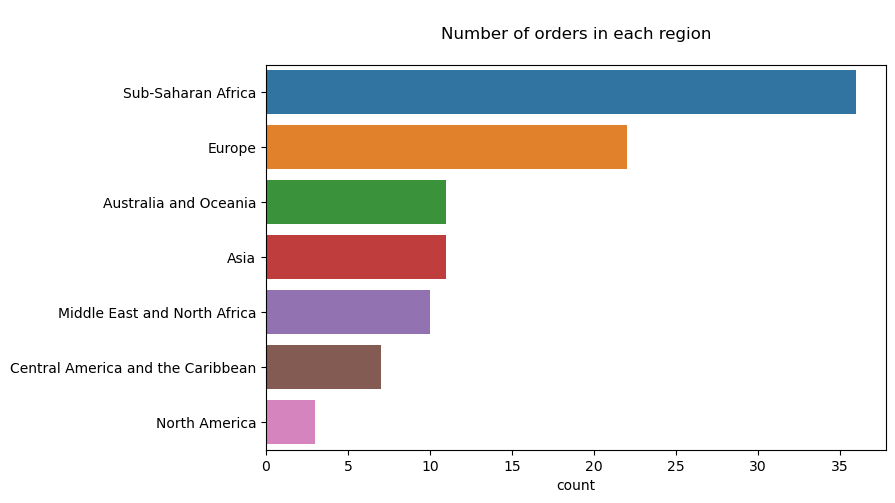

In [10]:
## visualising which region has highest number of orders
plt.figure(figsize=(8,5))
sns.countplot(y=df['Region'], order=df['Region'].value_counts().sort_values(ascending=False).index)
plt.ylabel('')
plt.title('\nNumber of orders in each region\n');

**Observations:**
1. Highest number of orders is from **`Sub-Saharan Africa region`**.
2. Least number of order is from **`North America`**.

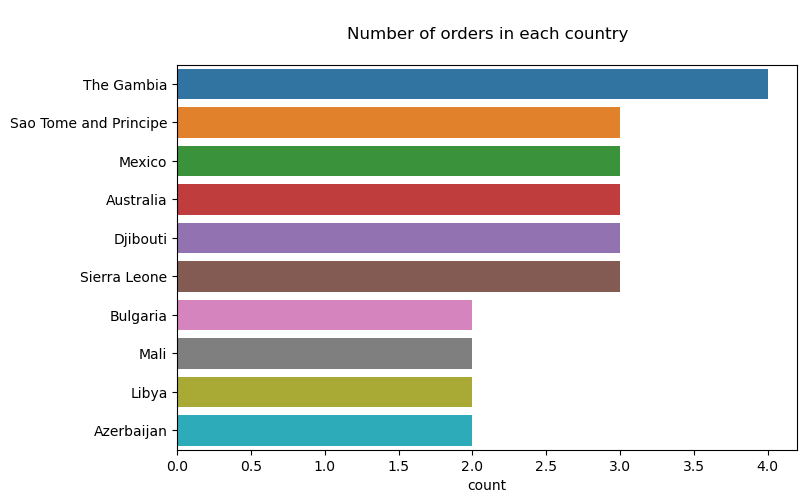

In [11]:
##let's find top 10 countries with highest number of orders
plt.figure(figsize=(8,5))
sns.countplot(y=df['Country'], order=df['Country'].value_counts().sort_values(ascending=False).head(10).index)
plt.ylabel('')
plt.title('\nNumber of orders in each country\n');

* **`The Gambia`** has highest number of orders of 4.

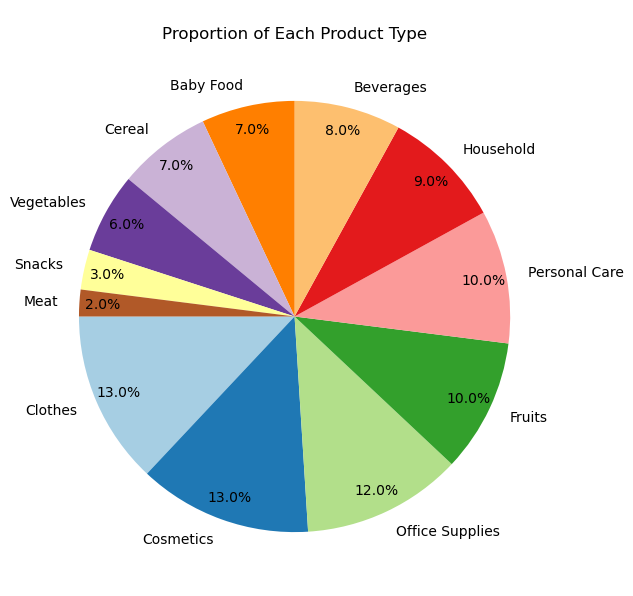

In [12]:
## types of product with its proportion of of total 
type_counts = df['Item Type'].value_counts()

# Plotting a pie chart with percentage labels
plt.figure(figsize=(7, 7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Paired.colors, pctdistance=0.89)
plt.title('\nProportion of Each Product Type')

plt.show()

**Observations:**
1. Highest number of times a product ordered is **`Clothes`** followed by **`Office Supplies`**.
2. Lowest orders was for **`Meat`** and **`Snacks`**.

In [13]:
## sales channel value counts
df['Sales Channel'].value_counts()

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

* There is a perfect proportion between Online sales and Offline sales. This means **`Sales Channel`** is not much affecting our number of orders.

In [14]:
## order priority
df['Order Priority'].value_counts()

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

## 2. Bivariate Analaysis

In [15]:
## calculating sum of 'total profit' for each Region
grouped_data = df.groupby('Region').agg({'Units Sold': 'sum','Total Revenue': 'sum','Total Cost': 'sum',
                                         'Total Profit': 'sum'}).reset_index().sort_values(by='Total Profit', ascending =False)

grouped_data.reset_index(drop=True)

,Region,Units Sold,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,182870,39672031.43,27488820.03,12183211.40
1,Europe,98117,33368932.11,22285993.48,11082938.63
2,Asia,59967,21347091.02,15233245.15,6113845.87
3,Middle East and North Africa,48678,14052706.58,8291514.72,5761191.86
4,Australia and Oceania,68325,14094265.13,9372105.10,4722160.03
5,Central America and the Caribbean,35771,9170385.49,6323477.64,2846907.85
6,North America,19143,5643356.55,4185413.79,1457942.76


**Observations:**
* Sub-Saharan Africa is the region with highest **`Total Profit`** among all regions.
* Australia and Oceanic region has more 'Units Sold' than 'Asia' and 'Middle East and North Africa' but it has less 'Total Profit' than both the other regions. There might be some factors affecting this change or variation. We'll find it later.

In [16]:
## total profits for all types of items
grouped_item_data = df.groupby('Item Type').agg({'Units Sold': 'sum','Total Revenue': 'sum','Total Cost': 'sum',
                                         'Total Profit': 'sum'}).reset_index().sort_values(by='Total Profit', ascending =False)

grouped_item_data.reset_index(drop=True)

,Item Type,Units Sold,Total Revenue,Total Cost,Total Profit
0,Cosmetics,83718,36601509.60,22045460.94,14556048.66
1,Household,44727,29889712.29,22477106.58,7412605.71
2,Office Supplies,46967,30585380.07,24655796.32,5929583.75
3,Clothes,71260,7787292.80,2553958.40,5233334.40
4,Baby Food,40545,10350327.60,6463683.90,3886643.70
5,Cereal,25877,5322898.90,3030455.47,2292443.43
6,Vegetables,20051,3089057.06,1823237.43,1265819.63
7,Personal Care,48708,3980904.84,2760282.36,1220622.48
8,Beverages,56708,2690794.60,1802747.32,888047.28
9,Snacks,13637,2080733.46,1328789.28,751944.18


**Observations:**
1. **`Cosmetics`** has the highest Profit, Units Sold and Revenue from all Item Types.
2. **`Fruits`** is the least profit scoring among all the items.
3. Above we can see some disparity among the Units Sold, Revenue and Profit for some Items as even having the units sold or Total Revenue as higher than the other it has lower Total Profit than that item. This might give us some insights for better conclusions.

In [17]:
## let's find the total profit for 'Online' and 'Offline' Sales Channel.
grouped_sales_data = df.groupby('Sales Channel').agg({'Units Sold': 'sum','Total Revenue': 'sum','Total Cost': 'sum',
                                         'Total Profit': 'sum'}).reset_index().sort_values(by='Total Profit', ascending =False)

grouped_sales_data.reset_index(drop=True)

,Sales Channel,Units Sold,Total Revenue,Total Cost,Total Profit
0,Offline,276782,79094809.20,54174082.53,24920726.67
1,Online,236089,58253959.11,39006487.38,19247471.73


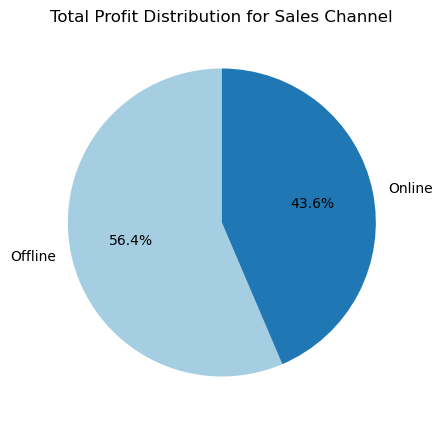

In [18]:
plt.figure(figsize=(5, 5))

# Plotting a pie chart
plt.pie(grouped_sales_data['Total Profit'], labels=grouped_sales_data['Sales Channel'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Profit Distribution for Sales Channel');

**Observations:**
* We have generated more profits in **`Offline`** Sales Channel than **`Online`**.

In [19]:
## order priority
grouped_order_data = df.groupby('Order Priority').agg({'Units Sold': 'sum','Total Revenue': 'sum','Total Cost': 'sum',
                                         'Total Profit': 'sum'}).reset_index().sort_values(by='Total Profit', ascending =False)

grouped_order_data.reset_index(drop=True)

,Order Priority,Units Sold,Total Revenue,Total Cost,Total Profit
0,H,154212,48749546.05,31857946.47,16891599.58
1,L,146876,36628127.46,25769399.60,10858727.86
2,M,94832,33116031.75,23446489.25,9669542.50
3,C,116951,18855063.05,12106734.59,6748328.46


**Observations:**
* Highest profit and units sold is for **`H`** and lowest profit is for **`C`** but lowest units sold is for **`M`**.


In [20]:
year_data = df.groupby('order_year').agg({'Units Sold': 'sum', 'Total Profit': 'sum'}).sort_values(by='Total Profit',ascending=False).reset_index()
year_data

,order_year,Units Sold,Total Profit
0,2012,97967,9213010.12
1,2013,64663,6715420.04
2,2010,61571,6629567.43
3,2014,92040,5879461.68
4,2016,43156,4903838.01
5,2017,49226,4089353.45
6,2015,49480,3996539.44
7,2011,54768,2741008.23


* Year 2012 has the highest `profit` among all the years.

In [21]:
month_data = df.groupby('order_month').agg({'Units Sold': 'sum', 'Total Profit': 'sum'}).sort_values(by='Total Profit',ascending=False).reset_index()
month_data

,order_month,Units Sold,Total Profit
0,7,83395,5921371.46
1,5,54745,5823056.69
2,11,49547,5622271.12
3,10,56191,4607184.94
4,6,42434,4128692.12
5,1,48794,4049786.11
6,4,32386,3084152.04
7,8,50947,2526680.38
8,9,28596,2399313.74
9,2,33700,2383463.83


* Month number 7 ,i.e, `July` month has the highest profit combined all year followed by `May` and `November`.

In [22]:
## highest profit generating item type
item_data = df.groupby('Item Type').agg({'Units Sold': 'sum','Total Revenue':'sum', 'Total Profit': 'sum'}).sort_values(by='Total Profit',ascending=False).reset_index()
item_data

,Item Type,Units Sold,Total Revenue,Total Profit
0,Cosmetics,83718,36601509.60,14556048.66
1,Household,44727,29889712.29,7412605.71
2,Office Supplies,46967,30585380.07,5929583.75
3,Clothes,71260,7787292.80,5233334.40
4,Baby Food,40545,10350327.60,3886643.70
5,Cereal,25877,5322898.90,2292443.43
6,Vegetables,20051,3089057.06,1265819.63
7,Personal Care,48708,3980904.84,1220622.48
8,Beverages,56708,2690794.60,888047.28
9,Snacks,13637,2080733.46,751944.18


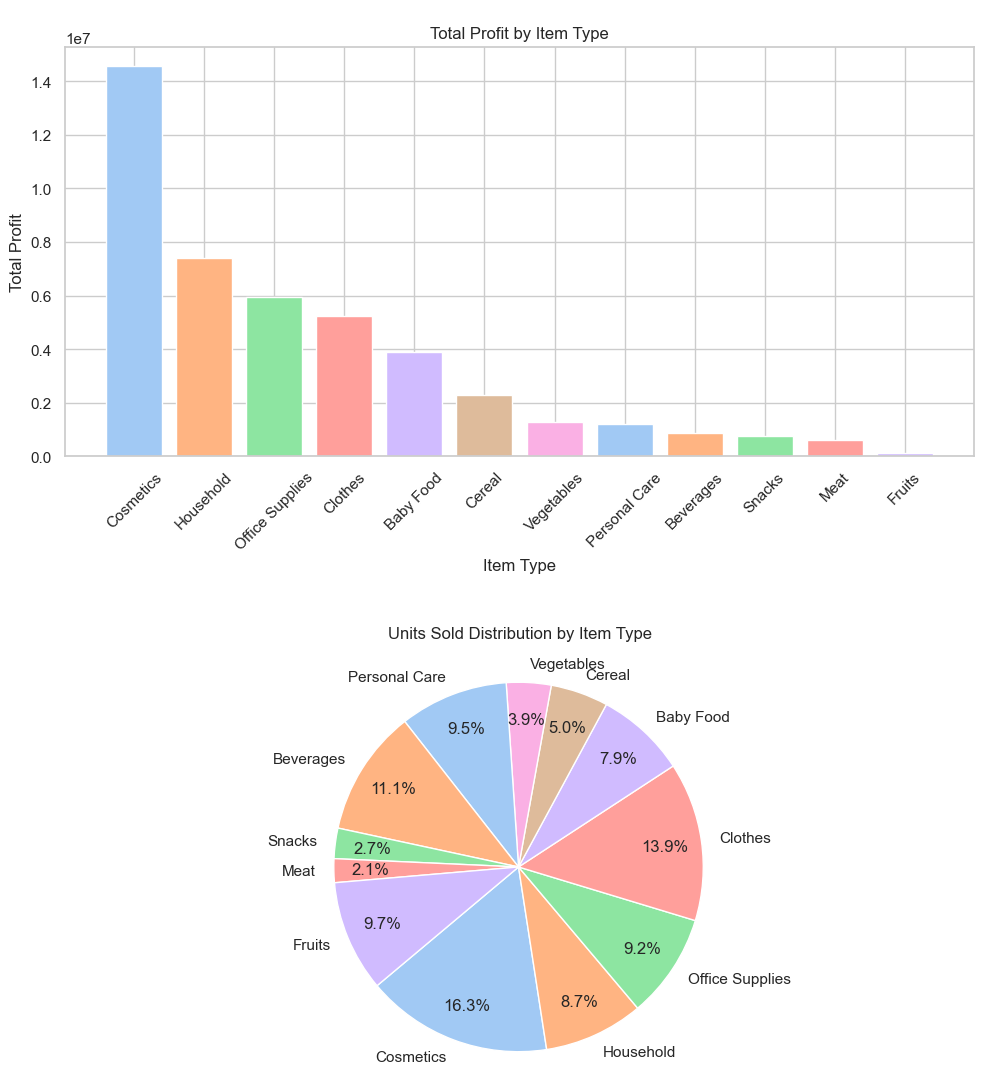

In [23]:
# visualising the above data
sns.set(style="whitegrid")

# Create a bar plot for 'Total Profit'
plt.figure(figsize=(10, 11))
plt.subplot(2, 1, 1)
bar_colors = sns.color_palette("pastel", n_colors=len(grouped_data))
plt.bar(item_data['Item Type'], item_data['Total Profit'], color=bar_colors)
plt.xlabel('Item Type')
plt.xticks(rotation=45)
plt.ylabel('Total Profit')
plt.title('\nTotal Profit by Item Type')

# Create a pie chart for 'Units Sold' with light colors
plt.subplot(2, 1, 2)
pie_colors = sns.color_palette("pastel", n_colors=len(grouped_data))
plt.pie(item_data['Units Sold'], labels=item_data['Item Type'], autopct='%1.1f%%', startangle=220, colors=pie_colors,pctdistance=0.8)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('\n\nUnits Sold Distribution by Item Type\n')

plt.tight_layout()  # Adjust layout for better appearance
plt.show()


### Observations:
* Cosmetics items are the most profit generating product and also the highest number of units sold.
* Household items are having second highest profit even having less units sold than Office Supplies, Clothes, Meat, Personal Care and Fruits.
* Lowest units sold and total profit are for `Meat` and `Fruits` respectively.

## Multivariate Analysis

In [24]:
# Group by 'Region' and count the number of unique countries in each region
countries_per_region = df.groupby('Region')['Country'].nunique()

# Display the result
print('Number of countries in each region:\n\n',countries_per_region)


Number of countries in each region:

 Region
Asia                                  9
Australia and Oceania                 9
Central America and the Caribbean     6
Europe                               19
Middle East and North Africa          8
North America                         1
Sub-Saharan Africa                   24
Name: Country, dtype: int64


In [25]:
## finding the most profit generating item for each region

max_profit_indices = df.groupby('Region')['Total Profit'].idxmax()

# Use the indices to get the corresponding rows
max_profit_items = df.loc[max_profit_indices]

# Display or use max_profit_items as needed
max_profit_items.drop(['order_month','ship_month'], axis=1, inplace=True)
max_profit_items

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order_year,ship_year
33,Asia,Myanmar,Household,Offline,H,177713572,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,2015,2015
79,Australia and Oceania,Samoa,Cosmetics,Online,H,670854651,9654,437.20,263.33,4220728.80,2542187.82,1678540.98,2013,2013
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2017,2017
46,Europe,Iceland,Cosmetics,Online,C,331438481,8867,437.20,263.33,3876652.40,2334947.11,1541705.29,2016,2016
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,231145322,9892,437.20,263.33,4324782.40,2604860.36,1719922.04,2013,2013
75,North America,Mexico,Household,Offline,C,986435210,6954,668.27,502.54,4647149.58,3494663.16,1152486.42,2014,2014
59,Sub-Saharan Africa,Djibouti,Cosmetics,Offline,H,259353148,7215,437.20,263.33,3154398.00,1899925.95,1254472.05,2014,2014


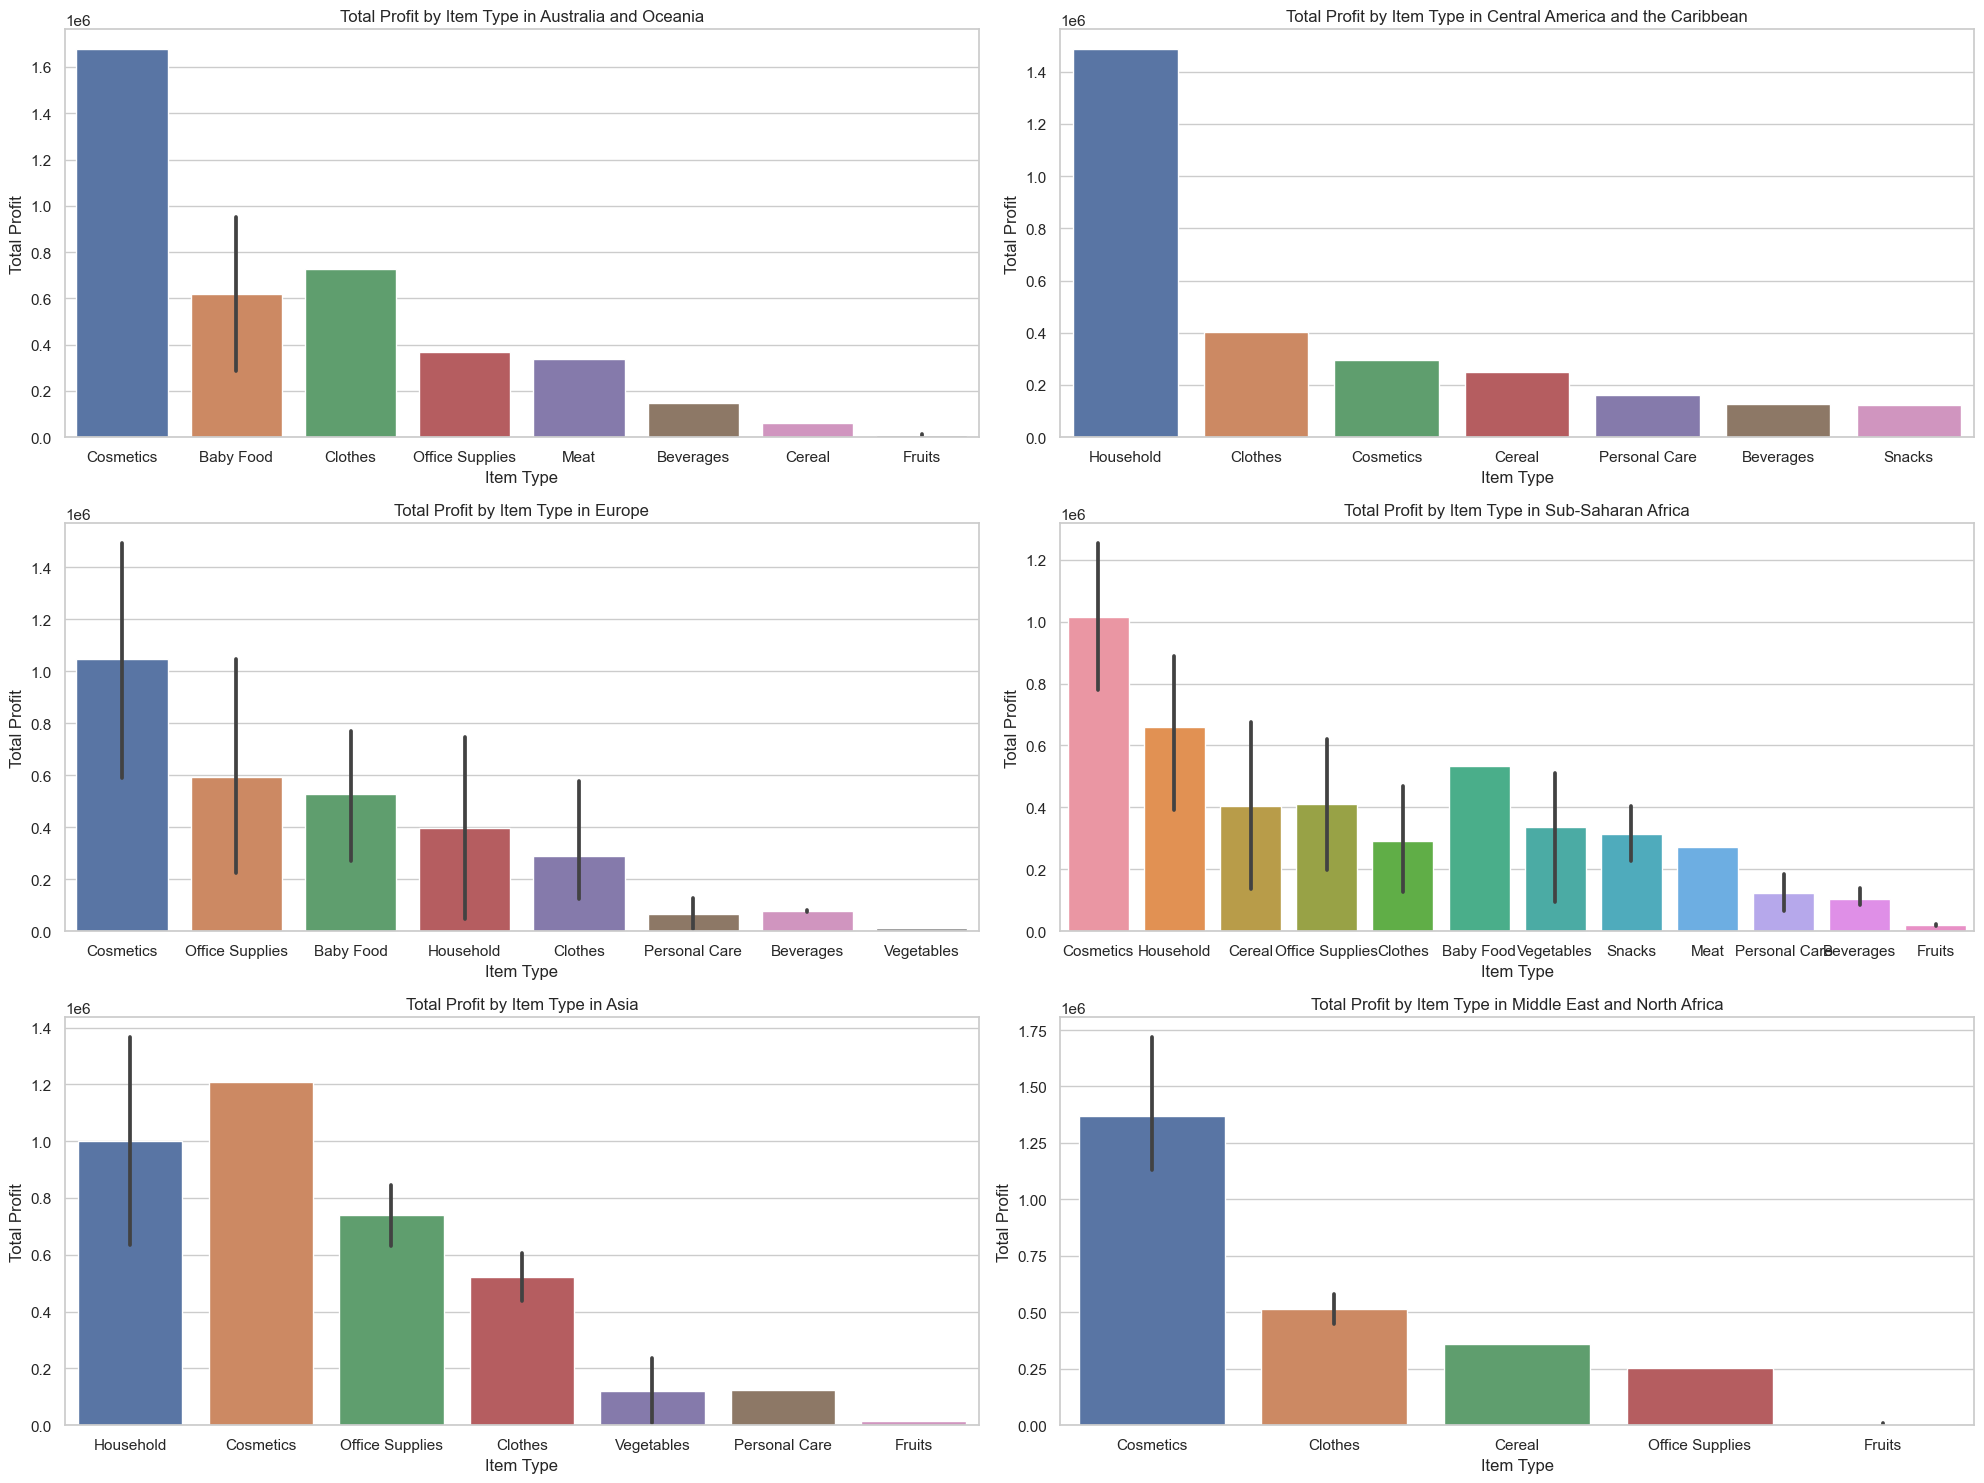

In [26]:
## let's find the top items for each region in terms of profit
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # You can adjust the number of rows and columns

# Get unique regions
regions = df['Region'].unique()

# Iterate over regions and create bar charts
for region, ax in zip(regions, axes.flatten()):
    region_data = df[df['Region'] == region]
    
    # Sort the DataFrame by 'Total Profit' in ascending order
    region_data_sorted = region_data.sort_values(by='Total Profit', ascending=False)
    
    sns.barplot(y='Total Profit', x='Item Type', data=region_data_sorted, ax=ax)
    ax.set_title(f'Total Profit by Item Type in {region}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [27]:
df['order_year'].value_counts()

order_year
2012    22
2014    15
2013    12
2011    12
2015    11
2010    10
2016    10
2017     8
Name: count, dtype: int64

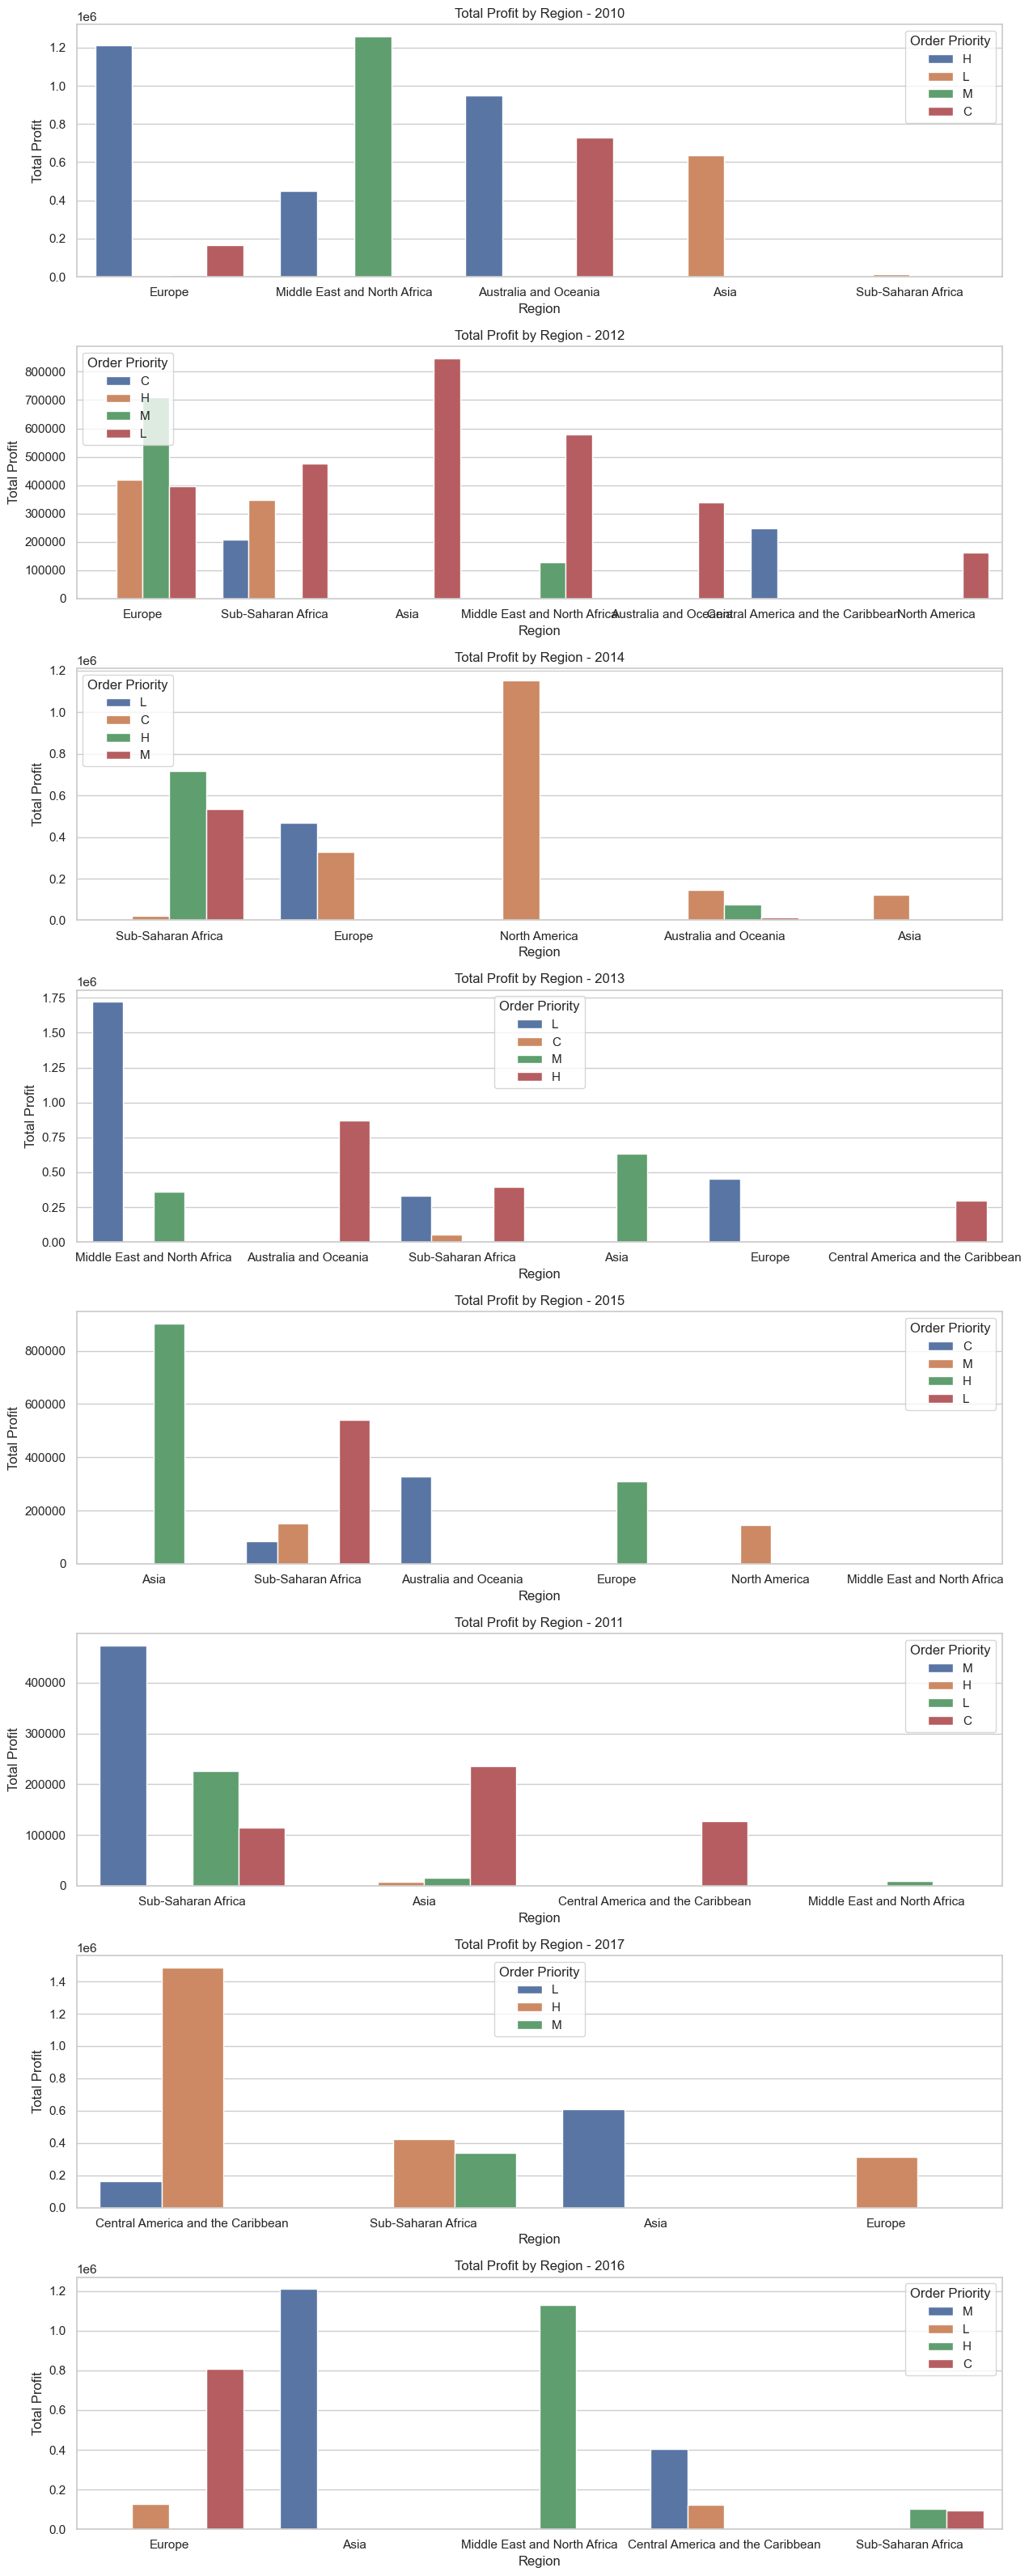

In [28]:
# Get unique years
years = df['order_year'].unique()

# Set up the matplotlib figure
plt.figure(figsize=(13, 4 * len(years)))

# Loop through each year
for i, year in enumerate(years, 1):
    plt.subplot(len(years), 1, i)  # Create a subplot for each year
    
    # Filter the data for the current year
    year_data = df[df['order_year'] == year]
    
    # Sort regions by total profit in descending order
    sorted_regions = year_data.groupby("Region")["Total Profit"].sum().sort_values(ascending=False).index
    
    # Create a bar plot
    sns.barplot(
        x="Region",
        y="Total Profit",
        hue="Order Priority",
        data=year_data,
        order=sorted_regions,
        ci=None,  # Turn off error bars for better visibility
    )
    
    # Set plot titles and labels
    plt.title(f'Total Profit by Region - {year}')
    plt.xlabel('Region')
    plt.ylabel('Total Profit')
    plt.legend(title='Order Priority')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show();


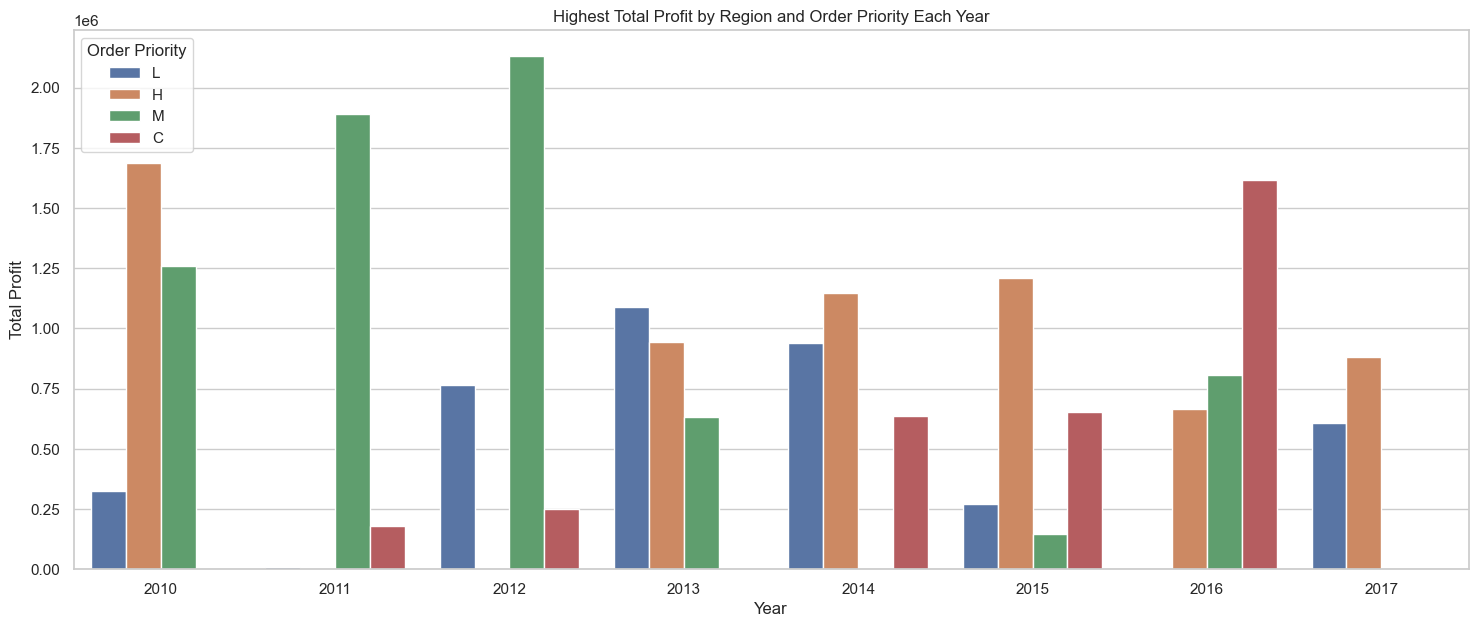

In [29]:

# Find the highest total profit for each region in each year
highest_profits = df.groupby(['order_year', 'Region', 'Order Priority'])['Total Profit'].sum().reset_index()
highest_profits = highest_profits.loc[highest_profits.groupby(['order_year', 'Region'])['Total Profit'].idxmax()]

# Set up the matplotlib figure
plt.figure(figsize=(18, 7))

# Create a stacked bar plot
sns.barplot(
    x='order_year',
    y='Total Profit',
    hue='Order Priority',
    data=highest_profits,
    ci=None,  # Turn off error bars for better visibility
)

# Set plot title and labels
plt.title('Highest Total Profit by Region and Order Priority Each Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(title='Order Priority')

# Show the plot
plt.show()
